Fitting 5 folds for each of 672 candidates, totalling 3360 fits
           Decision Tree
accuracy            0.85
precision           0.87
recall              0.80
f1                  0.84
Saved dt_metrics.csv in outputs folder


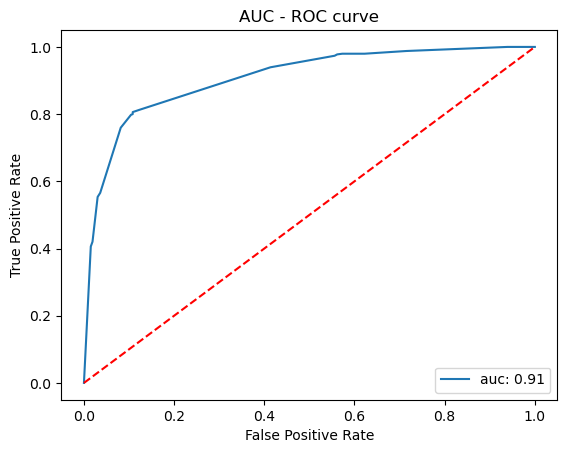

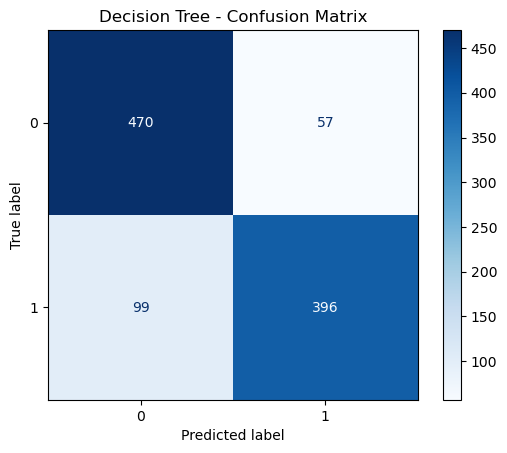

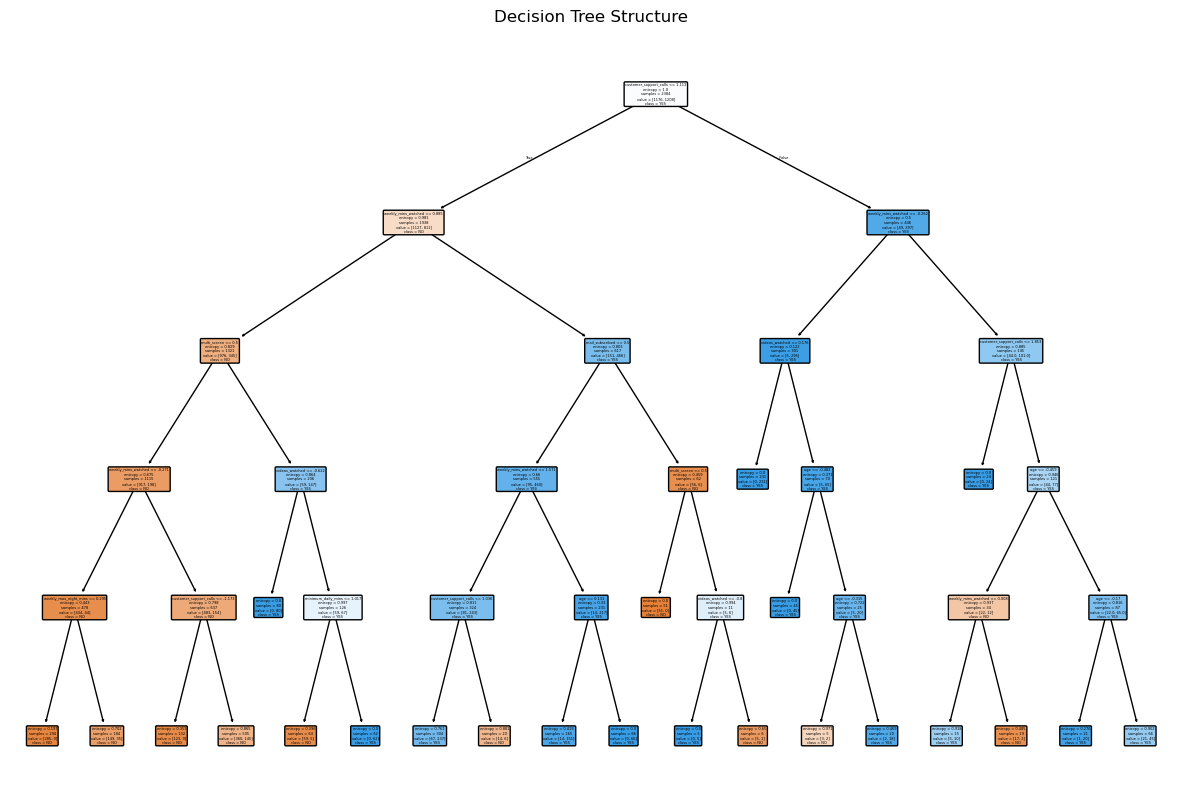

In [1]:
# Customer Churn Prediction using Decision Tree

import os
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, confusion_matrix, ConfusionMatrixDisplay

# 1. Load Dataset
df = pd.read_csv("Churn_preprocessed_data.csv")  # Make sure churn_data.csv is in the same folder

x = df.drop('churn', axis=1)
y = df['churn']

# 2. Train-Test Split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

# 3. Grid Search for Best Decision Tree
dtree = DecisionTreeClassifier()

param = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [2,3,4,5],
    'min_samples_split': [2,3,4,5,6,7],
    'min_samples_leaf': [3,4,5,6,7,8,9],
    'random_state': [0,42]
}

grid_search = GridSearchCV(
    dtree,
    param,
    scoring='accuracy',
    cv=5,
    verbose=True
)

grid_search.fit(x_train, y_train)

best_model = grid_search.best_estimator_

# 4. Predictions and Metrics
y_pred = best_model.predict(x_test)

accuracy = round(accuracy_score(y_test, y_pred), 2)
precision = round(precision_score(y_test, y_pred), 2)
recall = round(recall_score(y_test, y_pred), 2)
f1 = round(f1_score(y_test, y_pred), 2)

metric = [accuracy, precision, recall, f1]
idx = ['accuracy', 'precision', 'recall', 'f1']
metric_df = pd.DataFrame(metric, index=idx, columns=['Decision Tree'])
print(metric_df)

# Save metrics
os.makedirs("outputs", exist_ok=True)
metric_df.to_csv("outputs/dt_metrics.csv")
print("Saved dt_metrics.csv in outputs folder")

# 5. ROC-AUC
prob = best_model.predict_proba(x_test)
prob_df = pd.DataFrame(prob, columns=['NO', 'YES'])
prob_yes = prob_df['YES']

auc_score = roc_auc_score(y_test, prob_yes)
fpr, tpr, threshold = roc_curve(y_test, prob_yes)
plt.plot(fpr, tpr, label=f'auc: {auc_score:.2f}')
plt.plot([0,1],[0,1],'r--')
plt.legend(loc='lower right')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('AUC - ROC curve')
plt.savefig("outputs/dt_roc_curve.png", dpi=300)
plt.show()

# 6. Confusion Matrix
cmt = confusion_matrix(y_test, y_pred)
display = ConfusionMatrixDisplay(confusion_matrix=cmt, display_labels=[0,1])
display.plot(cmap=plt.cm.Blues)
plt.title("Decision Tree - Confusion Matrix")
plt.savefig("outputs/dt_confusion_matrix.png", dpi=300)
plt.show()

# 7. Plot Decision Tree
plt.figure(figsize=(15,10))
plot_tree(best_model, feature_names=x.columns, class_names=['NO','YES'], filled=True, rounded=True)
plt.title("Decision Tree Structure")
plt.savefig("outputs/dt_tree.png", dpi=300)